In [2]:
pip install networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 3.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


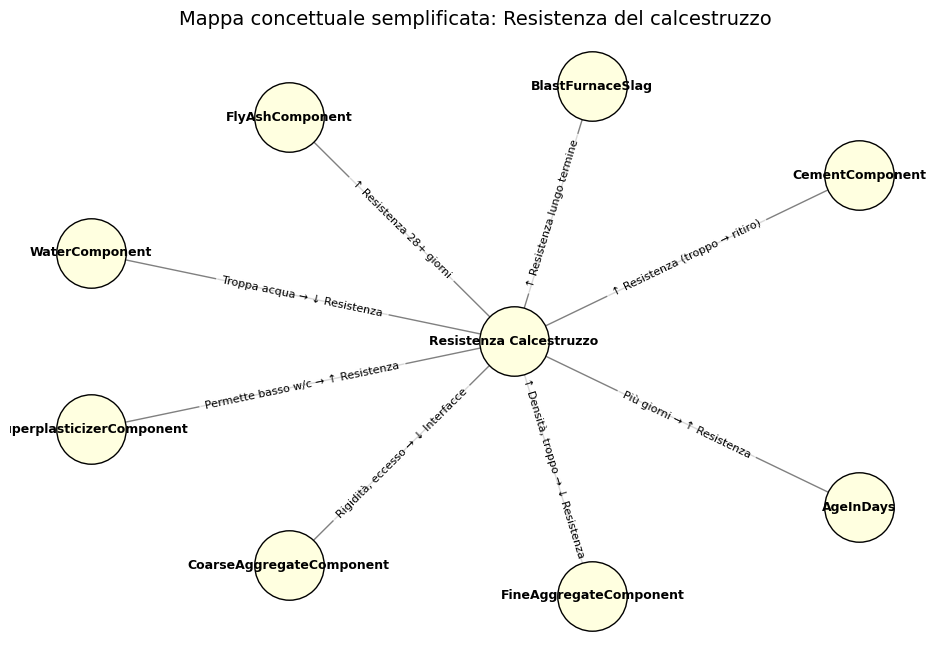

In [9]:
import matplotlib.pyplot as plt
import networkx as nx

# Dizionario con descrizioni sintetiche
variables_short = {
    "CementComponent": "↑ Resistenza (troppo → ritiro)",
    "BlastFurnaceSlag": "↑ Resistenza lungo termine",
    "FlyAshComponent": "↑ Resistenza 28+ giorni",
    "WaterComponent": "Troppa acqua → ↓ Resistenza",
    "SuperplasticizerComponent": "Permette basso w/c → ↑ Resistenza",
    "CoarseAggregateComponent": "Rigidità, eccesso → ↓ Interfacce",
    "FineAggregateComponent": "↑ Densità, troppo → ↓ Resistenza",
    "AgeInDays": "Più giorni → ↑ Resistenza"
}

# Nuovo grafo
G = nx.DiGraph()
G.add_node("Resistenza Calcestruzzo", style="filled", color="lightgray")

# Aggiunta archi
for var, descr in variables_short.items():
    G.add_node(var)
    G.add_edge(var, "Resistenza Calcestruzzo", label=descr)

# Layout circolare con nodo centrale forzato
pos = nx.circular_layout(G)
pos["Resistenza Calcestruzzo"] = [0, 0]

# Disegno del grafo
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_size=2500, node_color="lightyellow", edgecolors="black")
nx.draw_networkx_labels(G, pos, font_size=9, font_weight="bold")
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=15, edge_color="gray", ) #zorder=1

# Etichette sugli archi in primo piano
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_size=8,
    bbox=dict(alpha=0.7, color="white"),  # sfondo bianco semitrasparente
    # zorder=2
)

plt.title("Mappa concettuale semplificata: Resistenza del calcestruzzo", fontsize=14)
plt.axis("off")

# Salvataggio in PNG e PDF
plt.savefig("mappa_concettuale_calcestruzzo.png", format="png", dpi=300, bbox_inches="tight")
plt.savefig("mappa_concettuale_calcestruzzo.pdf", format="pdf", bbox_inches="tight")

# Mostra a schermo
plt.show()